En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:


- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste


- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kstest

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None 


In [2]:
df = pd.read_csv("data/adult.data_limpio.csv", index_col = 0)

In [3]:
df.head(2)

,work_class,final_weight,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary,census
39,,,,,,,,,,,,,,,
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,32755,Bajo
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,45156,Bajo


In [4]:
df.shape

(32560, 15)

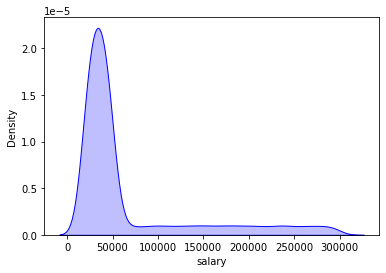

In [5]:
# Veamos si nuestra variable respuesta cumple con la asunción de normalidad visualmente 
sns.distplot(
    df["salary"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

No es una campana gauss perfecta, por lo cual no son son normales. Para confirmar utilizaremos el test de Kolmogórov-Smirnov.

In [6]:
from scipy.stats import kstest

In [7]:
kstest(df["salary"], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

- El p-value de 0 nos indica que lo que habíamos observado visualmente es correcto: Rechazamos la H0 (Hipotesis nula): los datos no son normales. Procedemos a intentar normalizarla para poder hacer un modelo de regresión lineal.

1. Probamos normalización logaritmíca:

In [8]:
df["salary_log"] = df["salary"].apply(lambda x: np.log(x) if x > 0 else 0)

In [9]:
df.head()

,work_class,final_weight,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary,census,salary_log
39,,,,,,,,,,,,,,,,
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,32755,Bajo,10.396811
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,45156,Bajo,10.717878
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,39938,Bajo,10.595084
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,26464,Bajo,10.183541
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,36976,Bajo,10.518024


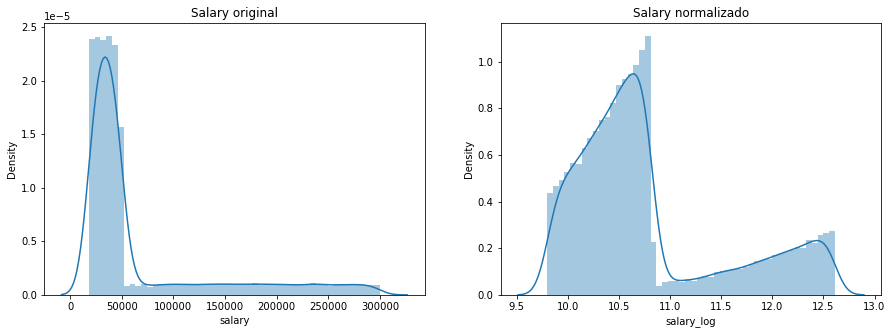

In [10]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Salary original')
axes[1].set_title('Salary normalizado')

sns.distplot(df['salary'] ,ax = axes[0])
sns.distplot(df["salary_log"], ax = axes[1]);

In [11]:
kstest(df["salary_log"], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

- Tras la normalización logaritmíca observamos que nuestra distribución ha cambiado pero sigue sin aproximarse a una normal. Comprobamos con el saphiro test, y concluimos que esta normalización no nos sirve para incluir la variable respuesta en un modelo de regresión lineal. 

2. Raíz cuadrada

In [12]:
df["salary_raiz"] = df["salary"].apply(lambda x: math.sqrt(x))

In [13]:
df.head()

,work_class,final_weight,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary,census,salary_log,salary_raiz
39,,,,,,,,,,,,,,,,,
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,32755,Bajo,10.396811,180.983425
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,45156,Bajo,10.717878,212.499412
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,39938,Bajo,10.595084,199.844940
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,26464,Bajo,10.183541,162.677595
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,36976,Bajo,10.518024,192.291445


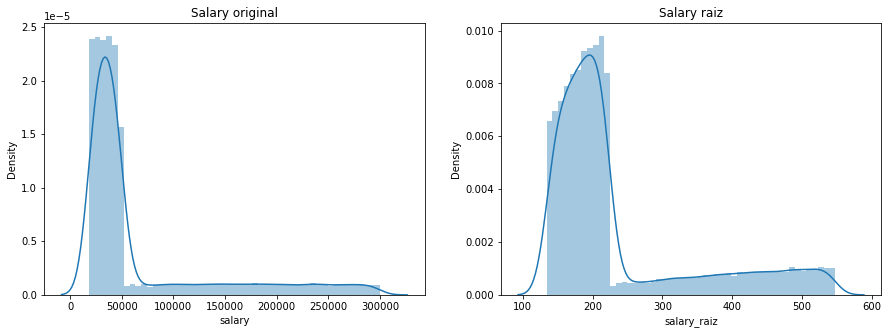

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Salary original')
axes[1].set_title('Salary raiz')

sns.distplot(df['salary'] ,ax = axes[0])
sns.distplot(df["salary_raiz"], ax = axes[1]);

In [15]:
kstest(df["salary_raiz"], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

- Nuestros resultados siguen sin ser normales tras la normalización con raíz cuadrada. Continuemos buscando un método que ajuste un poco mejor la distribución de nuestros datos. 

3. Box-cox

In [16]:
df['salary_boxcox'], lambda_ajustada = stats.boxcox(df['salary'])

In [17]:
lambda_ajustada

-0.7958290057455063

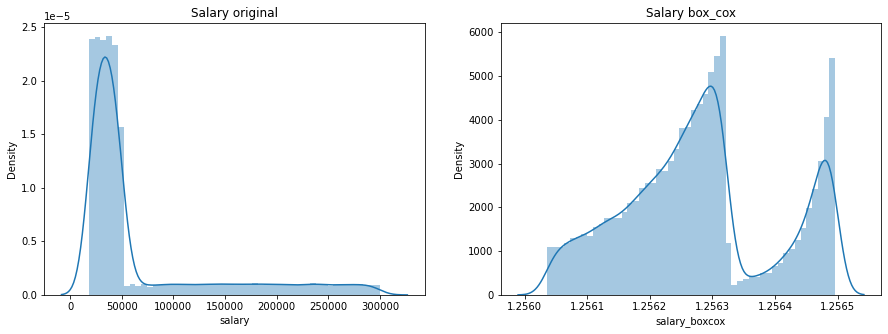

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Salary original')
axes[1].set_title('Salary box_cox')

sns.distplot(df['salary'] ,ax = axes[0])
sns.distplot(df["salary_boxcox"], ax = axes[1]);

In [19]:
kstest(df["salary_boxcox"], 'norm')

KstestResult(statistic=0.8954484155521318, pvalue=0.0)

- Tras la normalización con el método box cox nuestros datos siguen sin ser normales. 

4. MinMaxScaler

In [20]:
# extraemos las columnas numéricas
numericas = df.select_dtypes(include = np.number)

In [21]:
# construir el modelo de escalador
minmax = MinMaxScaler()

In [22]:
# ajustamos el modelo utilizando nuestro set de datos
minmax.fit(df[['final_weight']])

MinMaxScaler()

In [23]:
# transformamos los datos
fw_normalizadas = minmax.transform(df[["salary"]])

In [24]:
# Vamos a verificar los valores mínimos después de la normalización
fw_normalizadas.min(axis=0)

array([0.00388272])

In [25]:
# y los máximos?
fw_normalizadas.max(axis=0)

array([0.19539194])

In [26]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_minmax = pd.DataFrame(fw_normalizadas, columns = ["salary_sklearn"])
numericas_minmax.head(2)

,salary_sklearn
0,0.013902
1,0.022324


In [27]:
# incorporamos la columna al dataframe 

df["salary_sklearn"] = numericas_minmax
df.head(2)

,work_class,final_weight,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary,census,salary_log,salary_raiz,salary_boxcox,salary_sklearn
39,,,,,,,,,,,,,,,,,,,
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,32755,Bajo,10.396811,180.983425,1.256231,0.004481
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,45156,Bajo,10.717878,212.499412,1.256303,0.016912


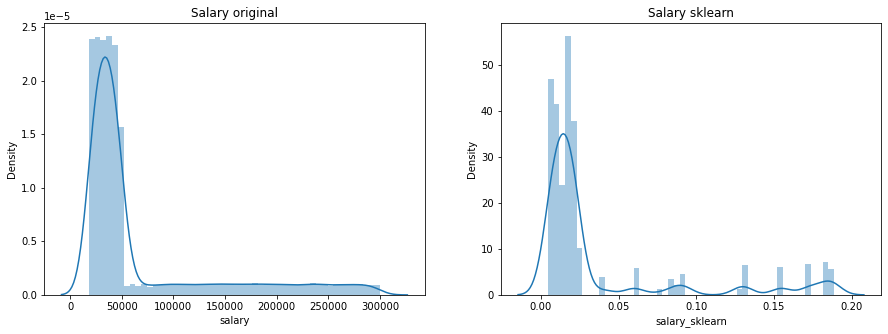

In [28]:
# ahora chequeemos si nuestra variable tiene una distribución normal

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Salary original')
axes[1].set_title('Salary sklearn')

sns.distplot(df['salary'] ,ax = axes[0])
sns.distplot(df["salary_sklearn"], ax = axes[1]);

- Como podemos observar este método es quizás el mas desacertado de todos los que hemos utilizado. No haremos ni el test de shapiro. 

<AxesSubplot:title={'center':'Salary Weight logaritmica'}, xlabel='salary_log', ylabel='Density'>

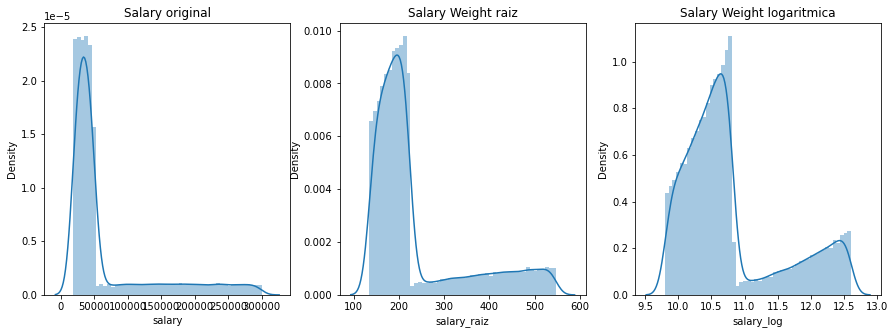

In [29]:
fig, axes = plt.subplots(1, 3, figsize = (15,5))

axes[0].set_title('Salary original')
axes[1].set_title('Salary Weight raiz')
axes[2].set_title('Salary Weight logaritmica')

sns.distplot(df['salary'] ,ax = axes[0])
sns.distplot(df["salary_raiz"], ax = axes[1])
sns.distplot(df["salary_log"], ax = axes[2])

# Conclusión REVISAR
- En este caso, observamos que el método más adecuado para normalizar nuestros datos sería la normalización logaritmíca, porque es la que genera una distribución más centrada. Por lo tanto nos quedaremos con esa columna y borraremos las demás normalizaciones de nuestro df. Los test de Shapiro nos arrojan el mismo valor, por ello solo nos fijamos en las gráficas para llegar a esta conclusión.  

In [30]:
df.columns


Index(['work_class', 'final_weight', 'education', 'education_yrs',
       'marital_status', 'occupation', 'relationship', 'ethnicity', 'gender',
       'capital_gain', 'capital_lost', 'hours_week', 'country', 'salary',
       'census', 'salary_log', 'salary_raiz', 'salary_boxcox',
       'salary_sklearn'],
      dtype='object')

In [31]:
lista_eliminar = ['salary_raiz','salary_boxcox', 'salary_sklearn']
df.drop(columns = lista_eliminar, axis = 0, inplace = True)

In [32]:
df.head()

,work_class,final_weight,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary,census,salary_log
39,,,,,,,,,,,,,,,,
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,32755,Bajo,10.396811
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,45156,Bajo,10.717878
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,39938,Bajo,10.595084
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,26464,Bajo,10.183541
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,36976,Bajo,10.518024


In [33]:
# Guardamos el csv
df.to_csv("data/adult.data_normalizado.csv")